<a href="https://colab.research.google.com/github/Noa-k-git/PlacesRecognition/blob/main/Places.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Famous places around the world
<p dir='rtl'>
 מגישה: נועה קליין
</p>



---
*In order to see the code click twice on the text*


## In PyCharm

---

### Create Images Folders

*In order to create an images database I ran the following code on my computer in PyCharm.*

```
# Program Execution
search_and_save_images(places_dict, web_dict)
```



 *After the program finished running I uploaded the folders to my Google Drive.*

In [ ]:
!pip install selenium

#Imports Packages
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

import os.path
import time


def element_completely_viewable(webpage, elem, sub_elem):
    """
    :param webpage: webpage driver
    :param elem: the element
    :param sub_elem: cover element element
    :return: bool value which indicates if the element is completely viewable
    """
    elem_left_bound = elem.location.get('x')
    elem_top_bound = elem.location.get('y')
    elem_width = elem.size.get('width')
    elem_height = elem.size.get('height')
    elem_right_bound = elem_left_bound + elem_width
    elem_lower_bound = elem_top_bound + elem_height
    logo_elem_top_bound = sub_elem.location.get('y')

    win_upper_bound = webpage.execute_script('return window.pageYOffset')
    win_left_bound = webpage.execute_script('return window.pageXOffset')
    win_width = webpage.execute_script('return document.documentElement.clientWidth')
    win_height = webpage.execute_script('return document.documentElement.clientHeight')
    win_right_bound = win_left_bound + win_width
    win_lower_bound = win_upper_bound + win_height  # - logo_elem_top_bound
    print(win_upper_bound, win_height, logo_elem_top_bound)
    return all((win_left_bound <= elem_left_bound,
                win_right_bound >= elem_right_bound,
                win_upper_bound <= elem_top_bound,
                win_lower_bound >= elem_lower_bound)
               )


def is_element_exist(webpage, xpath):
    """
    check if the element exist
    :param webpage: webpage driver
    :param xpath: the x path of the element
    :return: true if exist, otherwise false
    """
    try:
        webpage.find_element_by_xpath(xpath)
        return True
    except:
        return False


google_images_dict = {'link': 'https://www.google.ca/imghp?hl=en&tab=ri&authuser=0&ogbl',
                      'search_box_xpath': '//*[@id="sbtc"]/div/div[2]/input',
                      'img_xpath1': '//*[@id="islrg"]/div[1]/div[',
                      'img_xpath2': ']/a[1]/div[1]/img',
                      'more_imgs_xpath': '//*[@id="islmp"]/div/div/div/div/div[4]/div[2]/input',
                      'bad_elem_xpath': None}

pixabay_dict = {'link': 'https://pixabay.com/',
                'search_box_xpath': '//*[@id="hero"]/div[4]/form/div/span/input',
                'img_xpath1': '//*[@id="app"]/div[3]/div/div[2]/div/div[',
                'img_xpath2': ']/div/div/div/a/img',
                'more_imgs_xpath': '//*[@id="app"]/div[4]/div[1]/div[2]/a',
                'bad_elem_xpath': '/html/body/div[2]/div[3]'}

web_dict = {1: google_images_dict, 2: pixabay_dict}
places_dict = {'Taj Mahal': 1, 'Big Ben London': 1, 'Oxford buildings': 1,
               'Palazzo Ducale': 1, 'Colosseum': 1, 'pyramids': 1, 'Leaning Tower of Pisa': 1,
               'Buckingham': 1, 'Niagara Falls': 2, 'Garnier Opera': 1, 'Horseshoe Bend': 1,
               'el capitan yosemite': 1, 'Louvre Museum outside': 1,
               'Arc de Triomphe': 1, 'The Great Wall of China': 1, 'Hollywood Sign': 1, 'las vegas sign': 1,
               'Versailles Castle': 1, 'antelope canyon': 2,
               'Pantheon': 1, 'Sydney Opera House': 1}


def search_and_save_images(places_web_dict, web_details_dict):
    """
    a function that sorts and saves images from the internet by received dictionaries
    :param places_web_dict: famous locations around the world and their webpage
    :param web_details_dict: dictionary that contains websites data
    """

    for place in places_web_dict:
        print(str(place) + ":")
        new_path = 'D:/למידת מכונה/data/famous_places/Images/' + place
        if os.path.exists(new_path):
            continue
        else:
            os.makedirs(new_path)

        # Opens up web driver and goes to the website
        driver = webdriver.Edge(executable_path='C:/tmp/msedgedriver.exe')
        driver.get(web_details_dict.get(places_web_dict.get(place)).get('link'))

        # Searches the place in the website
        box = driver.find_element_by_xpath(web_details_dict.get(places_web_dict.get(place)).get('search_box_xpath'))
        box.click()
        box.send_keys(place)
        box.send_keys(Keys.ENTER)
        stop = 251
        i = 1
        img_web_num = 1
        driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_UP)
        while i != stop:
            filename = "D:/למידת מכונה/data/famous_places/Images/" + place + "/img (" + str(i) + ").png"

            element_xpath = web_details_dict.get(places_web_dict.get(place)).get('img_xpath1') + \
                            str(img_web_num) + \
                            web_details_dict.get(places_web_dict.get(place)).get('img_xpath2')

            if is_element_exist(driver, element_xpath):

                image = driver.find_element_by_xpath(element_xpath)
                bad_elem_xpath = web_details_dict.get(places_web_dict.get(place)).get('bad_elem_xpath')
                if is_element_exist(driver, bad_elem_xpath):
                    bad_elem = driver.find_element_by_xpath()

                    if element_completely_viewable(driver, image, bad_elem):
                        for d in range(2):
                            driver.find_element_by_tag_name('body').send_keys(Keys.ARROW_DOWN)
                        time.sleep(0.5)

                print(filename)

                if places_web_dict.get(place) == 1:
                    try:
                        driver.find_element_by_xpath(element_xpath).click()
                    except selenium.common.exceptions.ElementClickInterceptedException:
                        driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
                        time.sleep(0.1)
                        driver.find_element_by_xpath(element_xpath).click()
                    except selenium.common.exceptions.ElementNotInteractableException:
                        img_web_num += 1
                        continue
                    time.sleep(1)
                    driver.find_element_by_xpath('//*[@id="Sva75c"]/div/div/div[3]'
                                                 '/div[2]/c-wiz/div/div[1]/div[1]/'
                                                 'div/div[2]/a/img').screenshot(filename)



                else:
                    driver.find_element_by_xpath(element_xpath).screenshot(filename)


                i += 1
                img_web_num += 1

            else:
                if places_web_dict.get(place) == 1:
                    element_xpath = web_details_dict.get(places_web_dict.get(place)).get('img_xpath1') + str(
                        img_web_num + 1) + \
                                    web_details_dict.get(places_web_dict.get(place)).get('img_xpath2')
                    if is_element_exist(driver, element_xpath):
                        # stop += 1
                        img_web_num += 1
                        continue


                img_web_num = 1
                next_page_xpath = web_details_dict.get(places_web_dict.get(place)).get('more_imgs_xpath')
                if is_element_exist(driver, next_page_xpath):
                    driver.find_element_by_xpath(next_page_xpath).click()
                else:
                    break
        driver.close()
        print("\n\n")

     |████████████████████████████████| 911kB 2.8MB/s 


## In Google Colab

In [ ]:
#@title ###Import Project Libraries
#@markdown ##### And create constant variables

from IPython.display import clear_output
from google.colab import output

import numpy as np
import glob
import time
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import os.path

from imblearn.over_sampling import SMOTE

import sklearn.neural_network
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Reshape
from keras import metrics

clear_output()

# Constant variables
PATH = '/content/drive/MyDrive/Data/famous_places/'
CSV_PATH = 'img_df.csv'
NPZ_PATH = 'img_np.npz'

### Functions for Creating Datasets From Images

In [ ]:
def get_label_folder(folder_path):
    '''
    A function that returns the folder name in 2-d array

    Parameter: {folder_path : (str) The path of the folder}
    '''

    i = 1
    while folder_path[-i] != '/':
        i += 1
    return [[folder_path[-(i-1):]]]
get_label_folder.__doc__ = '''
    A function that returns the folder name in 2-d array

    Parameter: {folder_path : (str) The path of the folder}'''

def create_datasets(using = 'pd', path = '/content/drive/MyDrive/Data/famous_places/', csv_path = 'img_df.csv', npz_path = 'img_np.npz', txt_path = 'file_path.txt', save = 500, stop = 5):
    '''
    A function that transfers all the images in the directory to a tagged dataset.

    Parameters:
    using : (str) : Sets the module that creates the dataset. ('np' / 'pd').
    path: (str) : The path of the images folder called "Images" (without "Images").
    csv_path: (str) : The name of the csv file that contains all the images arrays
                        and their labels.
    npz_path: (str) : The name of the csv file that contains all the RGB images arrays
                        and their labels.
    txt_path: (str) : The name of the txt file that contains
                        the pathes of the images saved in the csv file.
    save: (int) : The number of images added each time the csv file is saved.
    stop : (int) : The number of uploads of the csv file.
    '''


    folders = glob.glob(path + 'Images/*') # path for the images folders
    WIDTH, HEIGHT = 100, 100 # image size (for the csv file)
    if using == 'pd':
        with_pd = True
    else:
        with_pd = False

    # reads/creates csv file
    try:
        if with_pd:
            df = pd.read_csv(path + csv_path)
            print("\nAfter loading csv:", df.shape)
        else:
            df = pd.read_csv(path + csv_path).to_numpy()

        all_np = np.load(path + npz_path)
        np_data = all_np['np_data']
        np_label = all_np['np_label']

        print('Existing dataset found...\n')
    except FileNotFoundError:
        df = None
        np_data, np_label = None, None


    load_exist = True
    counter_save, counter_stop = 0, 0
    new_files = ''

    for folder in folders:
        for f in glob.glob(folder+'/*.png'):
            if load_exist:
                if os.path.exists(path + txt_path):
                    with open(path + txt_path, mode='r') as txt:
                        if f in txt.read():
                            continue
                        else:
                            print("\nUpdating dataset...")


                load_exist = False


            counter_save += 1


            img_np = Image.open(f).resize((WIDTH, HEIGHT)).convert('RGB')
            img_df = img_np.copy().convert('L')

            img_label = get_label_folder(folder)

            img_df_data = np.asarray(img_df, dtype=np.uint8)/255
            img_df_data = img_df_data.reshape((1,WIDTH*HEIGHT))
            img_df_data = np.concatenate((img_df_data, img_label), axis=1)

            img_np_data = np.asarray(img_np, dtype=np.uint8)/255
            img_np_data = img_np_data.reshape((1,WIDTH, HEIGHT, 3))



            if df is None:
                if with_pd:
                    df = pd.DataFrame(img_df_data)
                else:
                    df = img_df_data

                np_data = img_np_data
                np_label = img_label
                print("Creating new dataset...")
            else:
                if with_pd:
                    df_new = pd.DataFrame(img_df_data, columns= df.columns)
                    df = df.append(df_new)
                else:
                    df = np.concatenate((df, img_df_data))

                np_data = np.concatenate((np_data, img_np_data))
                np_label = np.concatenate((np_label, img_label))


            new_files += '\n' + f


            if counter_save == save:
                df1 = pd.DataFrame(df)

                print("\nSaving dataset...", df1.shape)
                df1.to_csv(path + csv_path,encoding='utf-8', index=False)
                np.savez(path + npz_path, np_data=np_data, np_label=np_label)
                with open(path + txt_path, mode='a') as txt:
                    txt.write(new_files)
                print(str(save) + ' new images were added to the dataset...')

                new_files = ''

                counter_save = 0
                counter_stop += 1
                if counter_stop == stop:

                    print("\n\nThe current dataset:")
                    display(pd.read_csv(path + csv_path))
                    return
                    # raise KeyboardInterrupt('New images... check the dataset!')

        print(get_label_folder(folder), "data was successfully loaded!")


    df1 = pd.DataFrame(df)

    print("\nSaving dataset...", df1.shape)
    df1.to_csv(path + csv_path,encoding='utf-8', index=False)
    np.savez(path + npz_path, np_data=np_data, np_label=np_label)
    with open(path + txt_path, mode='a') as t:
        t.write(new_files)
    print("\nAll images were successfully loaded to the dataset!")

create_datasets.__doc__ = '''

    A function that transfers all the images in the directory to a tagged dataset.

    Parameters: using: str
                        Sets the module that creates the dataset. ('np' / 'pd')

                path: str
                        The path of the images folder called "Images" (without "Images").

                csv_path: str
                        The name of the csv file that contains all the bw images arrays
                        and their labels.

                npz_path: str
                        The name of the csv file that contains all the RGB images arrays
                        and their labels.

                txt_path: str
                        The name of the txt file that contains
                        the pathes of the images saved in the csv file.

                save: int
                        The number of images added each time the csv file is saved.

                stop: int
                        The number of uploads of the csv file.'''


# help(get_label_folder)
help(create_datasets)

Help on function create_datasets in module __main__:

create_datasets(using='pd', path='/content/drive/MyDrive/Data/famous_places/', csv_path='img_df.csv', npz_path='img_np.npz', txt_path='file_path.txt', save=500, stop=5)
    A function that transfers all the images in the directory to a tagged dataset.
    
    Parameters: using: str
                        Sets the module that creates the dataset. ('np' / 'pd')
    
                path: str
                        The path of the images folder called "Images" (without "Images").
    
                csv_path: str
                        The name of the csv file that contains all the bw images arrays
                        and their labels.
    
                npz_path: str
                        The name of the csv file that contains all the RGB images arrays
                        and their labels.
    
                txt_path: str
                        The name of the txt file that contains 
                        the pat

### Measuring Time

---
*Timer results:*
```
25.24368906021118
22.535624504089355
```
---

###Conclusion:
Using pandas to load data is faster than using numpy.


In [ ]:
start_np = time.time()
for i in range(2):
    create_datasets(using='np',
                    csv_path='df_img_use_np_test.csv',
                    npz_path='np_img_use_np_test.npz',
                    txt_path= 'np_test.txt',
                    save = 50, stop = 2)

end_np = time.time()


start_pd = time.time()
for i in range(2):
    create_datasets(using='pd',
                    csv_path='df_img_use_pd_test.csv',
                    npz_path='np_img_use_pd_test.npz',
                    txt_path= 'pd_test.txt',
                    save = 50, stop = 2)

end_pd = time.time()

print('np:', end_np - start_np)
print('pd:', end_pd - start_pd)

### Create dataset
In the faster way according to time meassuring.

*(using create_datasets func)*

In [ ]:
create_datasets(save = 750, stop = 7)

Creating new dataset...
[['Hollywood Sign']] data was successfully loaded!
[['Colosseum']] data was successfully loaded!
[['Garnier Opera']] data was successfully loaded!

Saving dataset... (750, 10001)
750 new images were added to the dataset...
[['el capitan yosemite']] data was successfully loaded!
[['las vegas sign']] data was successfully loaded!
[['Horseshoe Bend']] data was successfully loaded!

Saving dataset... (1500, 10001)
750 new images were added to the dataset...
[['Arc de Triomphe']] data was successfully loaded!
[['Big Ben London']] data was successfully loaded!
[['Buckingham']] data was successfully loaded!

Saving dataset... (2250, 10001)
750 new images were added to the dataset...
[['antelope canyon']] data was successfully loaded!
[['Taj Mahal']] data was successfully loaded!
[['Niagara Falls']] data was successfully loaded!

Saving dataset... (3000, 10001)
750 new images were added to the dataset...
[['Palazzo Ducale']] data was successfully loaded!
[['pyramids']] 

### Data Preparation

In [ ]:
#@title **Functions for Data Preparation**
#@markdown ---


def text_to_nums(arr1):
    '''
    A function that replaces all values in given array
    in numeric values.
    return new array and the dictionary of exchanges.

    Parameter: {arr1 : an array}'''
    if type(arr1) == pd.core.series.Series:
        d = dict(zip(arr1.unique(), range(len(arr1.unique()))))
    else:
        arr1 = arr1.flatten()
        d = dict(zip(pd.unique(arr1), range(len(pd.unique(arr1)))))
    arr2 = np.array([])
    for i in arr1: arr2 = np.append(arr2, d[i])

    return arr2, d
text_to_nums.__doc__ = '''

  A function that replaces all values in given array
  in numeric values.
  return new array and the dictionary of exchanges.

  Parameter:
      arr1 : ndarray : a np_file array'''


def get_key(dictionary, val):
  '''
  A function that returns the key of a value in dictionary.
  Parameters: {dictionary: (dict) The dictionary of the key,
                val: The value of the key}'''

  for key, value in dictionary.items():
    if val == value:
      return key
  return "key doesn't exist: " + str(val)
get_key.__doc__ = '''

  A function that returns the key of a value in dictionary.

  Parameters: dictionary: dict
                  The dictionary of the key.

              val:
                  The value of the key.'''


def print_line():
  'A function that prints a line.'
  print("\n--------------")
print_line.__doc__ = '''

  A function that prints a line.

  Example:
      >>> print_line()

      --------------'''


def count_values(arr):
  '''
  A function that prints the counter of each category in an array.
  Parameter: {arr : (ndarray) a np_file array}
  '''
  d = dict(zip(np.unique(arr), np.zeros(len(np.unique(arr)))))
  for i in arr: d[i] += 1
  print(d)
count_values.__doc__ = '''

  A function that prints the counter of each category in an array.

  Parameter:
      arr : ndarray : a np_file array'''


def df_resize(df_list):
  '''
  A function that get an array that contains dataframes
  and returns an array that contains the data of each dataframe
  from the original array in a different size.

  Parameter: {df_list : an array that contains dataframes}
  '''
  dim_tuple = (1, 100, 100, 1)

  for df in df_list:
    try:
      x = df.to_np_file()
    except AttributeError:
      x = df

    for img in x:
      try:
        x2 = np.concatenate((x2, np.resize(np.array(img), dim_tuple)))
      except NameError:
        x2 = np.array(np.resize(np.array(img), dim_tuple))

    try:
      return_list = np.concatenate((return_list, x2))
    except NameError:
      return_list = np.array(x2)

  return return_list
df_resize.__doc__ = '''
  A function that get an array that contains dataframes
  and returns an array that contains the data of each dataframe
  from the original array in a sifferent size.

  Parameter:
      df_list : an array that contains dataframes
  '''


--------------


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,0.392157,0.392157,0.392157,0.396078,0.396078,0.396078,0.396078,0.396078,0.396078,0.400000,0.400000,0.400000,0.403922,0.400000,0.403922,0.403922,0.403922,0.403922,0.403922,0.403922,0.403922,0.403922,0.403922,0.403922,0.403922,0.403922,0.403922,0.403922,0.407843,0.407843,0.407843,0.407843,0.407843,0.407843,0.411765,0.411765,0.411765,0.411765,0.411765,0.415686,...,0.117647,0.105882,0.145098,0.137255,0.125490,0.231373,0.325490,0.184314,0.388235,0.717647,0.686275,0.678431,0.658824,0.713725,0.490196,0.180392,0.090196,0.129412,0.200000,0.337255,0.380392,0.223529,0.160784,0.098039,0.098039,0.133333,0.258824,0.117647,0.117647,0.176471,0.137255,0.164706,0.184314,0.188235,0.168627,0.156863,0.172549,0.164706,0.168627,Hollywood Sign
1,0.329412,0.341176,0.341176,0.345098,0.349020,0.349020,0.349020,0.352941,0.356863,0.356863,0.356863,0.360784,0.360784,0.364706,0.364706,0.368627,0.372549,0.372549,0.376471,0.380392,0.388235,0.388235,0.388235,0.396078,0.392157,0.400000,0.400000,0.400000,0.403922,0.403922,0.403922,0.403922,0.407843,0.411765,0.407843,0.407843,0.411765,0.415686,0.415686,0.415686,...,0.223529,0.313725,0.345098,0.333333,0.341176,0.219608,0.149020,0.090196,0.066667,0.168627,0.305882,0.411765,0.450980,0.407843,0.419608,0.439216,0.439216,0.498039,0.486275,0.407843,0.415686,0.588235,0.654902,0.474510,0.392157,0.439216,0.458824,0.443137,0.478431,0.376471,0.160784,0.219608,0.372549,0.345098,0.290196,0.258824,0.294118,0.407843,0.419608,Hollywood Sign
2,0.674510,0.674510,0.674510,0.678431,0.686275,0.678431,0.674510,0.674510,0.678431,0.678431,0.678431,0.678431,0.678431,0.678431,0.678431,0.678431,0.678431,0.678431,0.678431,0.678431,0.678431,0.678431,0.678431,0.678431,0.678431,0.678431,0.678431,0.678431,0.678431,0.678431,0.678431,0.674510,0.678431,0.674510,0.674510,0.674510,0.674510,0.674510,0.674510,0.670588,...,0.023529,0.027451,0.031373,0.164706,0.207843,0.360784,0.192157,0.203922,0.415686,0.243137,0.196078,0.396078,0.462745,0.372549,0.313725,0.282353,0.478431,0.400000,0.211765,0.137255,0.172549,0.274510,0.188235,0.223529,0.176471,0.141176,0.168627,0.164706,0.078431,0.082353,0.152941,0.203922,0.207843,0.200000,0.168627,0.109804,0.192157,0.109804,0.180392,Hollywood Sign
3,0.458824,0.462745,0.462745,0.462745,0.462745,0.462745,0.458824,0.462745,0.462745,0.458824,0.462745,0.462745,0.462745,0.462745,0.462745,0.462745,0.462745,0.462745,0.466667,0.466667,0.470588,0.466667,0.466667,0.466667,0.466667,0.466667,0.470588,0.470588,0.466667,0.466667,0.466667,0.466667,0.462745,0.466667,0.466667,0.462745,0.462745,0.462745,0.466667,0.466667,...,0.227451,0.243137,0.356863,0.345098,0.184314,0.392157,0.478431,0.290196,0.223529,0.286275,0.364706,0.372549,0.337255,0.231373,0.239216,0.254902,0.325490,0.309804,0.196078,0.227451,0.325490,0.407843,0.533333,0.439216,0.384314,0.286275,0.243137,0.270588,0.192157,0.274510,0.254902,0.219608,0.172549,0.121569,0.247059,0.329412,0.290196,0.278431,0.094118,Hollywood Sign
4,0.549020,0.537255,0.521569,0.498039,0.490196,0.486275,0.486275,0.482353,0.482353,0.478431,0.474510,0.470588,0.470588,0.470588,0.474510,0.478431,0.478431,0.474510,0.470588,0.470588,0.470588,0.470588,0.470588,0.462745,0.462745,0.462745,0.454902,0.447059,0.443137,0.443137,0.443137,0.443137,0.439216,0.439216,0.439216,0.435294,0.435294,0.435294,0.431373,0.431373,...,0.223529,0.105882,0.286275,0.321569,0.372549,0.223529,0.129412,0.376471,0.419608,0.458824,0.513725,0.647059,0.513725,0.572549,0.435294,0.380392,0.188235,0.180392,0.349020,0.341176,0.262745,0.266667,0.203922,0.258824,0.172549,0.082353,0.105882,0.117647,0.129412,0.121569,0.141176,0.211765,0.396078,0.247059,0.270588,0.423529,0.258824,0.152941,0.211765,Hollywood Sign



--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4821 entries, 0 to 4820
Columns: 10001 entries, 0 to 10000
dtypes: float64(10000), object(1)
memory usage: 367.9+ MB
None

--------------
{'Hollywood Sign': 0, 'Colosseum': 1, 'Garnier Opera': 2, 'el capitan yosemite': 3, 'las vegas sign': 4, 'Horseshoe Bend': 5, 'Arc de Triomphe': 6, 'Big Ben London': 7, 'Buckingham': 8, 'antelope canyon': 9, 'Taj Mahal': 10, 'Niagara Falls': 11, 'Palazzo Ducale': 12, 'pyramids': 13, 'Leaning Tower of Pisa': 14, 'Sydney Opera House': 15, 'Louvre Museum outside': 16, 'Oxford buildings': 17, 'The Great Wall of China': 18, 'Pantheon': 19, 'Versailles Castle': 20}
{'Hollywood Sign': 0, 'Colosseum': 1, 'Garnier Opera': 2, 'el capitan yosemite': 3, 'las vegas sign': 4, 'Horseshoe Bend': 5, 'Arc de Triomphe': 6, 'Big Ben London': 7, 'Buckingham': 8, 'antelope canyon': 9, 'Taj Mahal': 10, 'Niagara Falls': 11, 'Palazzo Ducale': 12, 'pyramids': 13, 'Leaning Tower of Pisa': 14, 'Sydney Opera House

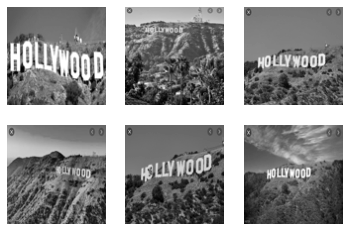


--------------

Category: Colosseum 



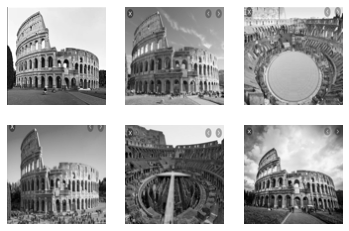


--------------

Category: Garnier Opera 



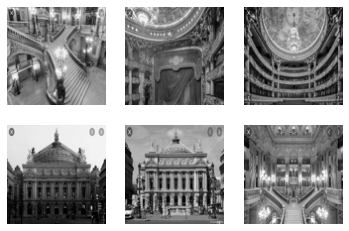


--------------

Category: el capitan yosemite 



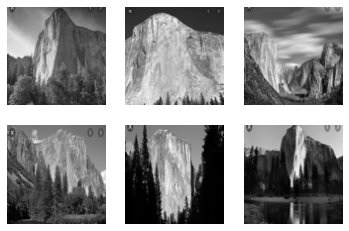


--------------

Category: las vegas sign 



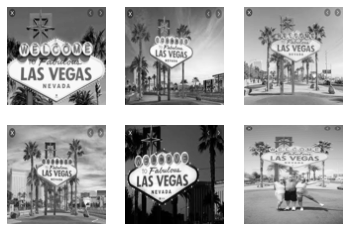


--------------

Category: Horseshoe Bend 



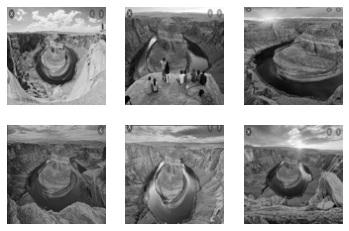


--------------

Category: Arc de Triomphe 



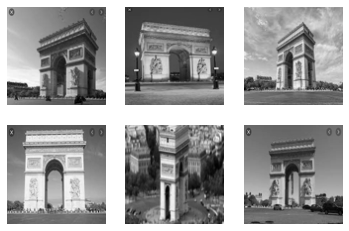


--------------

Category: Big Ben London 



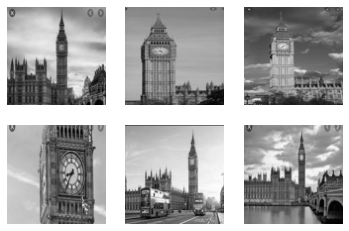


--------------

Category: Buckingham 



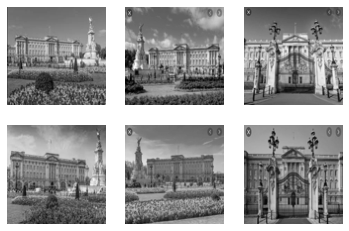


--------------

Category: antelope canyon 



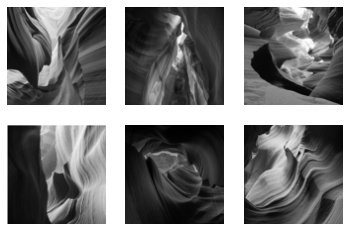


--------------

Category: Taj Mahal 



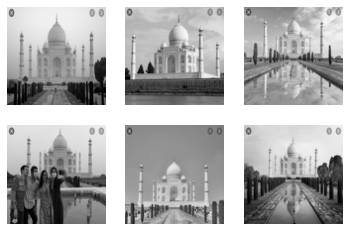


--------------

Category: Niagara Falls 



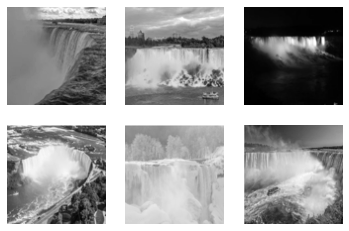


--------------

Category: Palazzo Ducale 



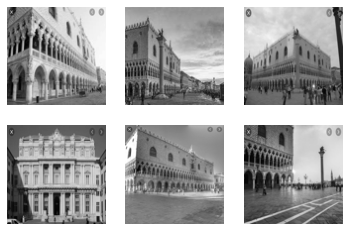


--------------

Category: pyramids 



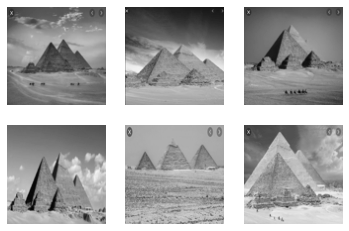


--------------

Category: Leaning Tower of Pisa 



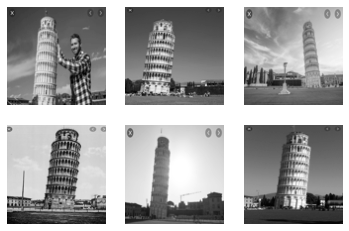


--------------

Category: Sydney Opera House 



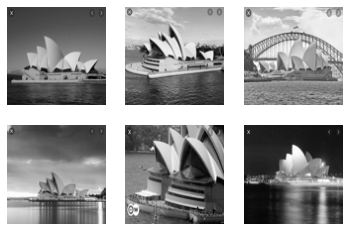


--------------

Category: Louvre Museum outside 



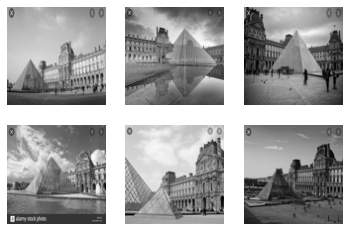


--------------

Category: Oxford buildings 



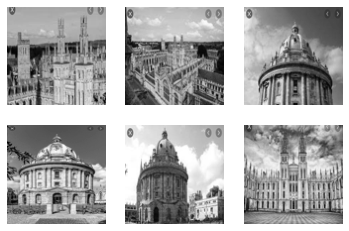


--------------

Category: The Great Wall of China 



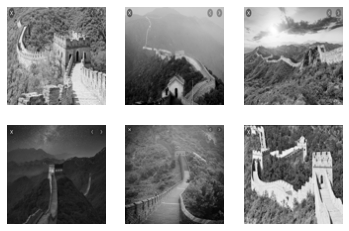


--------------

Category: Pantheon 



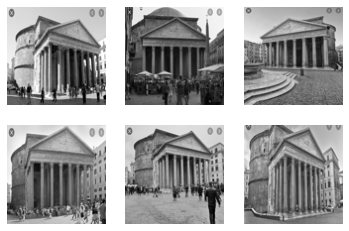


--------------

Category: Versailles Castle 



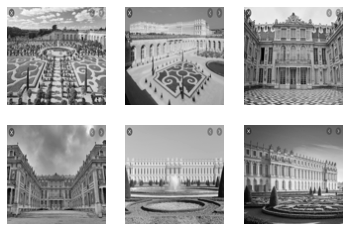


--------------


In [ ]:
#@title ###**Load dataset & Data preparation** { vertical-output : true}

# ----------------------------

# load dataset

df = pd.read_csv(PATH + CSV_PATH)

all_arr = np.load(PATH + NPZ_PATH)

np_data = all_arr['np_data']
np_labels = all_arr['np_label']


print_line()

display(df.head())

print_line()

print(df.info())


# drop duplicates
df.drop_duplicates(inplace=True)

# create labels array
df_labels = df.pop(df.columns[-1])

# transform labels to numbers
y1, values_dict1 = text_to_nums(df_labels)
y2, values_dict2 = text_to_nums(np_labels)
print_line()
print(values_dict1)
print(values_dict2)

# display 25 images from each category
category_loc = np.array([0]) # will contain the first row index of each category

for i in range(1, len(y1)):
    if y1[i] != y1[i-1]:
        category_loc = np.append(category_loc, i)


print_line()

for loc in np.unique(y1):
    print("\nCategory:", get_key(values_dict1, loc), "\n")
    for i in range(1, 7):
        plt.subplot(2,3,i)
        plt.axis("off")

        plt.imshow(np.asarray(df.iloc[[i + category_loc[round(loc)]]]).reshape((100,100))*255,cmap="gray", vmin=0, vmax=255)
    plt.show()

    print_line()


# divide data into 2 groups (train & test)
X_train1, X_test1, y_train1, y_test1 = train_test_split(df, y1, test_size = 0.15 ,random_state = 100)
X_train2, X_test2, y_train2, y_test2 = train_test_split(np_data, y2, test_size = 0.15 ,random_state = 100)

del df, all_arr, np_data, np_labels

In [ ]:
#@title **Balance data**

# balances data
sm = SMOTE(random_state=10)
X_smote1, y_smote1 = sm.fit_resample(X_train1, y_train1)
# prints the counter of each category in an array

clear_output() # clears the warning messages

help(count_values) # prints the count_values function documentation

print_line()
count_values(y_train1)
print_line()
count_values(y_smote1)

Help on function count_values in module __main__:

count_values(arr)
    A function that prints the counter of each category in an array.
    
    Parameter:  
        arr : ndarray : a np_file array


--------------
{0.0: 210.0, 1.0: 211.0, 2.0: 206.0, 3.0: 202.0, 4.0: 191.0, 5.0: 194.0, 6.0: 192.0, 7.0: 183.0, 8.0: 206.0, 9.0: 214.0, 10.0: 194.0, 11.0: 200.0, 12.0: 173.0, 13.0: 205.0, 14.0: 169.0, 15.0: 191.0, 16.0: 200.0, 17.0: 137.0, 18.0: 201.0, 19.0: 201.0, 20.0: 206.0}

--------------
{0.0: 214.0, 1.0: 214.0, 2.0: 214.0, 3.0: 214.0, 4.0: 214.0, 5.0: 214.0, 6.0: 214.0, 7.0: 214.0, 8.0: 214.0, 9.0: 214.0, 10.0: 214.0, 11.0: 214.0, 12.0: 214.0, 13.0: 214.0, 14.0: 214.0, 15.0: 214.0, 16.0: 214.0, 17.0: 214.0, 18.0: 214.0, 19.0: 214.0, 20.0: 214.0}


### Models - Black & White

---

#### Scikit-learn Model - MLP Classifier
---

In [ ]:
#@title #### Defining Model

mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (100,50,30),
                                           verbose= False, max_iter= 100)

In [ ]:
#@title #### Fit & Score

mlp.fit(X_smote1, y_smote1)
clear_output()
print("Training data prediction score: " + str(mlp.score(X_train1, y_train1)))
print("Testing data prediction score: " + str(mlp.score(X_test1, y_test1)))

y_pred = mlp.predict(X_test1)

print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1, y_pred))

Training data prediction score: 0.6747430249632893
Testing data prediction score: 0.2880886426592798
              precision    recall  f1-score   support

         0.0       0.17      0.22      0.19        27
         1.0       0.33      0.25      0.29        36
         2.0       0.20      0.38      0.27        29
         3.0       0.60      0.39      0.48        38
         4.0       0.33      0.10      0.15        30
         5.0       0.45      0.30      0.36        50
         6.0       0.25      0.36      0.30        47
         7.0       0.24      0.29      0.26        31
         8.0       0.05      0.06      0.06        32
         9.0       0.62      0.65      0.63        31
        10.0       0.25      0.38      0.30        40
        11.0       0.57      0.49      0.53        47
        12.0       0.07      0.17      0.10        18
        13.0       0.29      0.27      0.28        37
        14.0       0.64      0.23      0.34        30
        15.0       0.30      0.18 

#### Keras B&W Model - CNN
---

In [ ]:
#@title ####Creating Categorical y
y_smote1_keras = keras.utils.to_categorical(y_smote1)
y_test1_keras = keras.utils.to_categorical(y_test1)

In [ ]:
#@title ####Model

model_save_path = 'model1'

if os.path.exists(PATH + model_save_path):
    model_keras = load_model(PATH + model_save_path)
else:
    model_keras = Sequential()

    conv_size1 = (4,4)
    pool_size1 = (2, 2)
    dropout1 = 0.25

    model_keras.add(Reshape((100, 100, 1), input_shape=(10000,)))
    model_keras.add(Conv2D(32, conv_size1, padding='same', activation='relu'))
    model_keras.add(Conv2D(32, conv_size1, activation='relu'))
    model_keras.add(MaxPool2D(pool_size=pool_size1))
    model_keras.add(Dropout(dropout1))

    model_keras.add(Conv2D(64, conv_size1, padding='same', activation='relu'))
    model_keras.add(Conv2D(64, conv_size1, activation='relu'))
    model_keras.add(MaxPool2D(pool_size=pool_size1))
    model_keras.add(Dropout(dropout1))


    model_keras.add(Flatten())
    model_keras.add(Dense(250, activation='relu'))
    model_keras.add(Dense(21, activation='softmax'))
    model_keras.add(Dropout(dropout1 * 2))

    #
    model_keras.compile(optimizer = 'adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

    model_keras.summary()


    model_keras.fit( X_smote1, y_smote1_keras,
        batch_size= 78,
        epochs= 20,
        validation_data=(X_test1, y_test1_keras),
        shuffle=True,
        )

    model_keras.save(PATH + model_save_path)

rounded_predictions = model_keras.predict_classes(X_test1, batch_size=64, verbose=1)
rounded_labels = np.argmax(y_test1_keras, axis=1)

print(classification_report(rounded_labels, rounded_predictions))
print(confusion_matrix(rounded_labels, rounded_predictions))


output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


12/12 [==============================] - 11s 887ms/step
              precision    recall  f1-score   support

           0       0.30      0.30      0.30        27
           1       0.35      0.31      0.33        36
           2       0.31      0.48      0.38        29
           3       0.24      0.16      0.19        38
           4       0.56      0.50      0.53        30
           5       0.79      0.52      0.63        50
           6       0.62      0.49      0.55        47
           7       0.21      0.23      0.22        31
           8       0.27      0.31      0.29        32
           9       0.67      0.58      0.62        31
          10       0.38      0.38      0.38        40
          11       0.49      0.45      0.47        47
          12       0.07      0.11      0.08        18
          13       0.41      0.35      0.38        37
          14       0.41      0.37      0.39        30
          15       0.42      0.32      0.37        34
          16       0.19  

#### Conclusion
Keras CNN model is better than Sklearn MLP model for my problem.

### Optimization - Improving Keras Results

#### Model - RGB Data

In [ ]:
#@title #### Creating Categorical y

y_train2_keras = keras.utils.to_categorical(y_train2)
y_test2_keras = keras.utils.to_categorical(y_test2)

In [ ]:
#@title #### Model

model_save_path = 'model1_rgb'

if os.path.exists(PATH + model_save_path):
    model_keras = load_model(PATH + model_save_path)
else:
    keras.backend.clear_session()

    model_keras = Sequential()

    conv_size1 = (4,4)
    pool_size1 = (2, 2)
    dropout1 = 0.25


    model_keras.add(Conv2D(32, conv_size1, padding='same', activation='relu', input_shape=(100,100,3)))
    model_keras.add(Conv2D(32, conv_size1, activation='relu'))
    model_keras.add(MaxPool2D(pool_size=pool_size1))
    model_keras.add(Dropout(dropout1))

    model_keras.add(Conv2D(64, conv_size1, padding='same', activation='relu'))
    model_keras.add(Conv2D(64, conv_size1, activation='relu'))
    model_keras.add(MaxPool2D(pool_size=pool_size1))
    model_keras.add(Dropout(dropout1))

    model_keras.add(Flatten())
    model_keras.add(Dense(250, activation='relu'))
    model_keras.add(Dense(21, activation='softmax'))
    model_keras.add(Dropout(dropout1 * 2))


    model_keras.compile(optimizer = 'adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

    model_keras.summary()


    model_keras.fit(X_train2, y_train2_keras,
        batch_size= 78,
        epochs= 20,
        validation_data=(X_test2, y_test2_keras),
        shuffle=True,
        )


    model_keras.save(PATH + model_save_path)

rounded_predictions = model_keras.predict_classes(X_test2, batch_size=64, verbose=1)
rounded_labels = np.argmax(y_test2_keras, axis=1)

print(classification_report(rounded_labels, rounded_predictions))
print(confusion_matrix(rounded_labels, rounded_predictions))

output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


12/12 [==============================] - 11s 914ms/step
              precision    recall  f1-score   support

           0       0.31      0.42      0.36        26
           1       0.50      0.53      0.51        38
           2       0.55      0.53      0.54        30
           3       0.47      0.49      0.48        35
           4       0.47      0.83      0.60        30
           5       0.77      0.60      0.67        50
           6       0.76      0.32      0.45        50
           7       0.55      0.53      0.54        30
           8       0.15      0.14      0.14        29
           9       0.81      0.78      0.79        32
          10       0.50      0.50      0.50        38
          11       0.61      0.78      0.68        32
          12       0.27      0.29      0.28        34
          13       0.61      0.59      0.60        37
          14       0.62      0.54      0.58        24
          15       0.41      0.45      0.43        33
          16       0.42  

#### Conclusion - B&W / RGB

The model with RGB data preforms better than the model with BW data.

#### Functions for Keras Models

In [ ]:
def build_keras_rgb_model(conv_size = (4,4), pool_size = (2,2), dropout = 0.25, conv_nums = (32, 64), dense_nums = (250, 21)):
    """
    A function that builds & compiles model for RGB data.
    :param conv_size: the tile's size of the Convolutional layers.
    :param pool_size: the size of the pulling area.
    :param dropout: the dropout percent.
    :param conv_nums: num of different filter of each Convolutional layer.
    :param dense_nums: nodes number of each Dense layer.
    :return: compiled keras model.
    """
    keras.backend.clear_session()
    model = Sequential()

    for conv in conv_nums:
        model.add(Conv2D(conv, conv_size, padding='same', activation='relu', input_shape=(100,100,3)))
        model.add(Conv2D(conv, conv_size, activation='relu'))
        model.add(MaxPool2D(pool_size=pool_size))
        model.add(Dropout(dropout))

    model.add(Flatten())

    for dense in dense_nums[:-1]:
        model.add(Dense(dense, activation='relu'))
    model.add(Dense(dense_nums[-1], activation='softmax'))

    model.add(Dropout(dropout * 2))


    model.compile(optimizer = 'adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    return model



def keras_fit(model, X_train, y_train, X_test, y_test):
    """
    A function that call model.fit func.
    """
    model.fit(X_train, y_train,
        batch_size= 78,
        epochs= 20,
        validation_data=(X_test, y_test),
        shuffle=True,
        )


def keras_model_score(model, X, y):
    """
    A function that displays model metrics.
    :param model: the model
    :param X: data
    :param y: labels of data
    """
    rounded_predictions = model.predict_classes(X, batch_size=64, verbose=1)
    rounded_labels = np.argmax(y, axis=1)

    print(classification_report(rounded_labels, rounded_predictions))
    print(confusion_matrix(rounded_labels, rounded_predictions))

#### Improving Keras model

In [ ]:
#@title #### Changing Conv layers
# adding another conv block to the model
model_save_path = 'new_rgb_model_conv.h5'

if os.path.exists(PATH + model_save_path):
    new_model = load_model(PATH + model_save_path)
else:
    new_model = build_keras_rgb_model(conv_nums= (32, 64, 128))

    keras_fit(new_model, X_train2, y_train2_keras, X_test2, y_test2_keras)

    new_model.save(PATH + model_save_path)

    for i in range(2):
        output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

print_line()
print("New model (train data):")
keras_model_score(new_model, X_train2, y_train2_keras)
print_line()
print("First model (train data):")
keras_model_score(model_keras, X_train2, y_train2_keras)
print_line()
print("New model (test data):")
keras_model_score(new_model, X_test2, y_test2_keras)
print_line()
print("First model (test data):")
keras_model_score(model_keras, X_test2, y_test2_keras)
print_line()


--------------
New model (train data):


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


65/65 [==============================] - 81s 1s/step
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       218
           1       0.92      0.76      0.83       209
           2       0.71      0.74      0.73       206
           3       0.95      0.74      0.83       205
           4       0.92      0.98      0.95       191
           5       0.78      0.97      0.86       194
           6       0.91      0.83      0.87       189
           7       0.85      0.94      0.89       185
           8       0.89      0.71      0.79       209
           9       0.64      0.96      0.77       213
          10       0.82      0.90      0.86       199
          11       0.88      0.88      0.88       215
          12       0.91      0.63      0.74       157
          13       0.76      0.90      0.82       205
          14       0.86      0.93      0.90       175
          15       0.81      0.83      0.82       193
          16       0.91     

In [ ]:
#@title #### Increasing Size of Tiles

model_save_path = 'new_rgb_model_size1.h5'

if os.path.exists(PATH + model_save_path):
    new_model = load_model(PATH + model_save_path)
else:
    new_model = build_keras_rgb_model(conv_size= (6,6), pool_size=(4,4))

    keras_fit(new_model, X_train2, y_train2_keras, X_test2, y_test2_keras)

    new_model.save(PATH + model_save_path)

    for i in range(2):
        output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

print_line()
print("New model (train data):")
keras_model_score(new_model, X_train2, y_train2_keras)
print_line()
print("First model (train data):")
keras_model_score(model_keras, X_train2, y_train2_keras)
print_line()
print("New model (test data):")
keras_model_score(new_model, X_test2, y_test2_keras)
print_line()
print("First model (test data):")
keras_model_score(model_keras, X_test2, y_test2_keras)
print_line()

Epoch 1/20
53/53 [==============================] - 364s 7s/step - loss: 9.2802 - accuracy: 0.0562 - val_loss: 2.9855 - val_accuracy: 0.0635
Epoch 2/20
53/53 [==============================] - 362s 7s/step - loss: 9.2111 - accuracy: 0.0945 - val_loss: 2.6832 - val_accuracy: 0.1450
Epoch 3/20
53/53 [==============================] - 360s 7s/step - loss: 9.2992 - accuracy: 0.1233 - val_loss: 2.5954 - val_accuracy: 0.2030
Epoch 4/20
53/53 [==============================] - 360s 7s/step - loss: 9.1529 - accuracy: 0.1766 - val_loss: 2.4359 - val_accuracy: 0.2638
Epoch 5/20
53/53 [==============================] - 360s 7s/step - loss: 8.7711 - accuracy: 0.2058 - val_loss: 2.2703 - val_accuracy: 0.3343
Epoch 6/20
53/53 [==============================] - 360s 7s/step - loss: 8.8795 - accuracy: 0.2319 - val_loss: 2.1370 - val_accuracy: 0.3591
Epoch 7/20
53/53 [==============================] - 360s 7s/step - loss: 8.6421 - accuracy: 0.2559 - val_loss: 2.0859 - val_accuracy: 0.3867
Epoch 8/20
53

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


65/65 [==============================] - 75s 1s/step
              precision    recall  f1-score   support

           0       0.05      1.00      0.10       218
           1       0.00      0.00      0.00       209
           2       0.00      0.00      0.00       206
           3       0.00      0.00      0.00       205
           4       0.00      0.00      0.00       191
           5       0.00      0.00      0.00       194
           6       0.00      0.00      0.00       189
           7       0.00      0.00      0.00       185
           8       0.00      0.00      0.00       209
           9       0.00      0.00      0.00       213
          10       0.00      0.00      0.00       199
          11       0.00      0.00      0.00       215
          12       0.00      0.00      0.00       157
          13       0.00      0.00      0.00       205
          14       0.00      0.00      0.00       175
          15       0.00      0.00      0.00       193
          16       0.00     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


65/65 [==============================] - 61s 933ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       218
           1       0.96      0.99      0.97       209
           2       0.98      0.98      0.98       206
           3       0.94      0.97      0.95       205
           4       0.92      1.00      0.96       191
           5       0.99      0.99      0.99       194
           6       1.00      0.90      0.95       189
           7       0.93      0.98      0.95       185
           8       0.99      0.98      0.98       209
           9       0.99      0.99      0.99       213
          10       0.97      0.94      0.96       199
          11       0.91      0.99      0.95       215
          12       0.96      0.97      0.97       157
          13       0.98      0.95      0.97       205
          14       0.98      0.90      0.94       175
          15       0.96      0.96      0.96       193
          16       0.97  

In [ ]:
#@title #### Size of Tiles - (3,3)
# adding another conv block to the model
model_save_path = 'new_rgb_model_size2.h5'

if os.path.exists(PATH + model_save_path):
    new_model = load_model(PATH + model_save_path)
else:
    new_model = build_keras_rgb_model(conv_size= (3,3), pool_size=(3,3), )

    keras_fit(new_model, X_train2, y_train2_keras, X_test2, y_test2_keras)

    new_model.save(PATH + model_save_path)

    for i in range(2):
        output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

print_line()
print("New model (train data):")
keras_model_score(new_model, X_train2, y_train2_keras)
print_line()
print("First model (train data):")
keras_model_score(model_keras, X_train2, y_train2_keras)
print_line()
print("New model (test data):")
keras_model_score(new_model, X_test2, y_test2_keras)
print_line()
print("First model (test data):")
keras_model_score(model_keras, X_test2, y_test2_keras)
print_line()


--------------
New model (train data):


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


65/65 [==============================] - 30s 453ms/step
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       218
           1       0.85      0.98      0.91       209
           2       0.90      0.94      0.92       206
           3       0.94      0.96      0.95       205
           4       0.99      0.98      0.99       191
           5       0.99      0.96      0.98       194
           6       0.98      0.94      0.96       189
           7       0.96      0.92      0.94       185
           8       0.95      0.86      0.90       209
           9       0.96      1.00      0.98       213
          10       0.94      0.95      0.95       199
          11       0.97      0.95      0.96       215
          12       0.89      0.87      0.88       157
          13       0.89      0.96      0.92       205
          14       0.85      0.99      0.92       175
          15       1.00      0.94      0.97       193
          16       0.89  

In [ ]:
#@title #### Increasing Dropout

model_best_path = 'new_rgb_model_size2.h5'
model_save_path = 'new_rgb_model_dropout30.h5'

if os.path.exists(PATH + model_save_path):
    new_model = load_model(PATH + model_save_path)
else:
    new_model = build_keras_rgb_model(conv_size= (3,3), pool_size=(3,3), dropout=0.3)

    keras_fit(new_model, X_train2, y_train2_keras, X_test2, y_test2_keras)

    new_model.save(PATH + model_save_path)

    for i in range(2):
        output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

best_model = load_model(PATH + model_best_path)

print_line()
print("New model (train data):")
keras_model_score(new_model, X_train2, y_train2_keras)
print_line()
print("Best model (train data):")
keras_model_score(best_model, X_train2, y_train2_keras)
print_line()
print("New model (test data):")
keras_model_score(new_model, X_test2, y_test2_keras)
print_line()
print("Best model (test data):")
keras_model_score(best_model, X_test2, y_test2_keras)
print_line()


--------------
New model (train data):


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


65/65 [==============================] - 28s 434ms/step
              precision    recall  f1-score   support

           0       0.05      1.00      0.10       218
           1       0.00      0.00      0.00       209
           2       0.00      0.00      0.00       206
           3       0.00      0.00      0.00       205
           4       0.00      0.00      0.00       191
           5       0.00      0.00      0.00       194
           6       0.00      0.00      0.00       189
           7       0.00      0.00      0.00       185
           8       0.00      0.00      0.00       209
           9       0.00      0.00      0.00       213
          10       0.00      0.00      0.00       199
          11       0.00      0.00      0.00       215
          12       0.00      0.00      0.00       157
          13       0.00      0.00      0.00       205
          14       0.00      0.00      0.00       175
          15       0.00      0.00      0.00       193
          16       0.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


65/65 [==============================] - 28s 432ms/step
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       218
           1       0.85      0.98      0.91       209
           2       0.90      0.94      0.92       206
           3       0.94      0.96      0.95       205
           4       0.99      0.98      0.99       191
           5       0.99      0.96      0.98       194
           6       0.98      0.94      0.96       189
           7       0.96      0.92      0.94       185
           8       0.95      0.86      0.90       209
           9       0.96      1.00      0.98       213
          10       0.94      0.95      0.95       199
          11       0.97      0.95      0.96       215
          12       0.89      0.87      0.88       157
          13       0.89      0.96      0.92       205
          14       0.85      0.99      0.92       175
          15       1.00      0.94      0.97       193
          16       0.89  

In [ ]:
#@title #### Decrease Dropout

model_save_path = 'new_rgb_model_dropout20.h5'

if os.path.exists(PATH + model_save_path):
    new_model = load_model(PATH + model_save_path)
else:
    new_model = build_keras_rgb_model(conv_size= (3,3), pool_size=(3,3), dropout=0.2)

    keras_fit(new_model, X_train2, y_train2_keras, X_test2, y_test2_keras)

    new_model.save(PATH + model_save_path)

    for i in range(2):
        output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

best_model = load_model(PATH + model_best_path)

print_line()
print("New model (train data):")
keras_model_score(new_model, X_train2, y_train2_keras)
print_line()
print("Best model (train data):")
keras_model_score(best_model, X_train2, y_train2_keras)
print_line()
print("New model (test data):")
keras_model_score(new_model, X_test2, y_test2_keras)
print_line()
print("Best model (test data):")
keras_model_score(best_model, X_test2, y_test2_keras)
print_line()

Epoch 1/20
53/53 [==============================] - 123s 2s/step - loss: 7.8975 - accuracy: 0.0754 - val_loss: 2.8002 - val_accuracy: 0.1395
Epoch 2/20
53/53 [==============================] - 122s 2s/step - loss: 7.8116 - accuracy: 0.1555 - val_loss: 2.3203 - val_accuracy: 0.3052
Epoch 3/20
53/53 [==============================] - 125s 2s/step - loss: 7.3708 - accuracy: 0.2591 - val_loss: 2.1633 - val_accuracy: 0.3536
Epoch 4/20
53/53 [==============================] - 123s 2s/step - loss: 7.6028 - accuracy: 0.2940 - val_loss: 1.9221 - val_accuracy: 0.4392
Epoch 5/20
53/53 [==============================] - 123s 2s/step - loss: 7.3452 - accuracy: 0.3381 - val_loss: 1.8061 - val_accuracy: 0.4834
Epoch 6/20
53/53 [==============================] - 123s 2s/step - loss: 6.9135 - accuracy: 0.3758 - val_loss: 1.6742 - val_accuracy: 0.5124
Epoch 7/20
53/53 [==============================] - 123s 2s/step - loss: 7.2095 - accuracy: 0.3992 - val_loss: 1.5230 - val_accuracy: 0.5622
Epoch 8/20
53

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


65/65 [==============================] - 30s 460ms/step
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       218
           1       0.97      0.99      0.98       209
           2       0.97      0.98      0.97       206
           3       1.00      0.98      0.99       205
           4       0.99      1.00      1.00       191
           5       0.99      0.98      0.99       194
           6       0.99      1.00      0.99       189
           7       0.94      0.96      0.95       185
           8       0.98      0.93      0.96       209
           9       0.98      1.00      0.99       213
          10       0.99      0.94      0.96       199
          11       0.98      0.98      0.98       215
          12       0.97      0.90      0.93       157
          13       0.99      0.87      0.93       205
          14       0.96      0.99      0.98       175
          15       0.98      0.93      0.96       193
          16       0.96  

In [ ]:
#@title #### Changing Dense Layers

model_best_path = 'new_rgb_model_dropout20.h5'
model_save_path = 'new_rgb_model_dense_100.h5'

if os.path.exists(PATH + model_save_path):
    new_model = load_model(PATH + model_save_path)
else:
    new_model = build_keras_rgb_model(conv_size= (3,3), pool_size=(3,3), dropout=0.2, dense_nums=(100,21))

    keras_fit(new_model, X_train2, y_train2_keras, X_test2, y_test2_keras)

    new_model.save(PATH + model_save_path)

    for i in range(2):
        output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

best_model = load_model(PATH + model_best_path)

print_line()
print("New model (train data):")
keras_model_score(new_model, X_train2, y_train2_keras)
print_line()
print("Best model (train data):")
keras_model_score(best_model, X_train2, y_train2_keras)
print_line()
print("New model (test data):")
keras_model_score(new_model, X_test2, y_test2_keras)
print_line()
print("Best model (test data):")
keras_model_score(best_model, X_test2, y_test2_keras)
print_line()

Epoch 1/20
53/53 [==============================] - 126s 2s/step - loss: 7.9442 - accuracy: 0.0628 - val_loss: 2.7756 - val_accuracy: 0.1588
Epoch 2/20
53/53 [==============================] - 125s 2s/step - loss: 7.7603 - accuracy: 0.1601 - val_loss: 2.4790 - val_accuracy: 0.2500
Epoch 3/20
53/53 [==============================] - 124s 2s/step - loss: 7.8431 - accuracy: 0.2130 - val_loss: 2.3083 - val_accuracy: 0.3536
Epoch 4/20
53/53 [==============================] - 124s 2s/step - loss: 7.3051 - accuracy: 0.2625 - val_loss: 2.0772 - val_accuracy: 0.3854
Epoch 5/20
53/53 [==============================] - 124s 2s/step - loss: 7.4654 - accuracy: 0.3040 - val_loss: 1.8983 - val_accuracy: 0.4461
Epoch 6/20
53/53 [==============================] - 124s 2s/step - loss: 7.2102 - accuracy: 0.3371 - val_loss: 1.8009 - val_accuracy: 0.4696
Epoch 7/20
53/53 [==============================] - 124s 2s/step - loss: 6.9569 - accuracy: 0.3596 - val_loss: 1.8319 - val_accuracy: 0.4669
Epoch 8/20
53

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


65/65 [==============================] - 29s 441ms/step
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       218
           1       0.84      0.96      0.90       209
           2       0.87      0.92      0.89       206
           3       0.93      0.97      0.95       205
           4       0.98      0.99      0.99       191
           5       0.98      0.94      0.96       194
           6       0.95      0.87      0.91       189
           7       0.94      0.86      0.90       185
           8       0.96      0.76      0.85       209
           9       0.96      0.99      0.98       213
          10       0.97      0.91      0.94       199
          11       0.98      0.93      0.96       215
          12       0.87      0.84      0.85       157
          13       0.95      0.91      0.93       205
          14       0.85      0.98      0.91       175
          15       0.91      0.96      0.93       193
          16       0.78  

### My Images


--------------


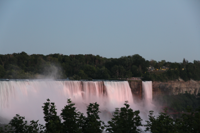

1/1 [==============================] - 0s 77ms/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Niagara Falls

--------------


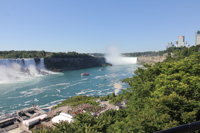

1/1 [==============================] - 0s 23ms/step
Niagara Falls

--------------


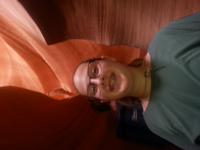

1/1 [==============================] - 0s 27ms/step
antelope canyon

--------------


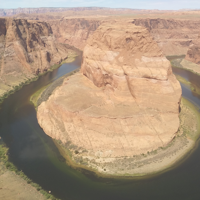

1/1 [==============================] - 0s 23ms/step
Horseshoe Bend

--------------


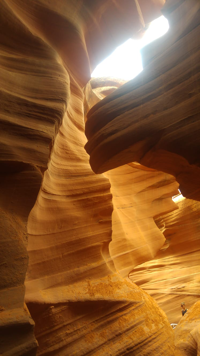

1/1 [==============================] - 0s 27ms/step
antelope canyon

--------------


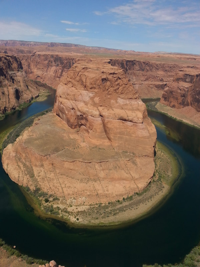

1/1 [==============================] - 0s 37ms/step
Horseshoe Bend

--------------


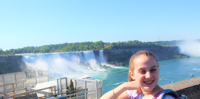

1/1 [==============================] - 0s 23ms/step
Niagara Falls

--------------


In [ ]:
model_best_path = 'new_rgb_model_dropout20.h5'
best_model = load_model(PATH + model_best_path)

imgs = glob.glob(PATH + 'My_Images/*') # path for the images folders
WIDTH, HEIGHT = 100, 100 # image size (for the csv file)

for img in imgs:
    img = Image.open(img)

    print_line()
    new_width_size = 200
    display(img.resize((new_width_size, round(img.height/(img.width/new_width_size)))))

    img = img.resize((WIDTH, HEIGHT))

    img_data = np.asarray(img, dtype=np.uint8)/255
    img_data = img_data.reshape((1,WIDTH, HEIGHT, 3))


    print(get_key(values_dict2, best_model.predict_classes(img_data, batch_size=64, verbose=1)))
print_line()